# О наборе данных



Это набор метаданных о __10 000__ _самых популярных фильмов в базе данных фильмов (TMDB) по состоянию на май 2023 года_. Набор данных включает такую информацию, как названия фильмов, даты выхода, продолжительность, жанры, продюсерские компании, бюджет и доходы. Эти данные собираются из общедоступного API TMDB .

_Немного о TMDB_

TMDB (база данных фильмов) — это популярная онлайн-база данных и платформа сообщества, которая предоставляет обширную коллекцию информации о фильмах, телешоу и другом связанном контенте. TMDB позволяет пользователям просматривать и искать фильмы и телепередачи, просматривать такую информацию, как актеры, съемочная группа, синопсис и рейтинги, а также вносить свой вклад в сообщество, добавляя свои собственные обзоры, рейтинги и другой контент.
___

__Цель__

Набор данных предназначен для использования аналитиками данных, исследователями и разработчиками, которые заинтересованы в изучении или анализе популярности и характеристик фильмов. Набор данных можно использовать для проведения широкого спектра анализов, таких как изучение тенденций в жанрах фильмов с течением времени, выявление закономерностей в бюджетах и доходах фильмов, а также анализ влияния различных атрибутов на популярность фильма.


__Атрибуты данных__

•	id : Уникальный идентификатор, присвоенный каждому фильму в базе данных TMDB.

•	title : Название фильма.

•	release_date : Дата выхода фильма.

•	genres : список жанров, связанных с фильмом.

•	original_language : Язык, на котором изначально был снят фильм.

•	voice_average : Средняя оценка фильма пользователями TMDB.

•	voice_count : количество голосов, отданных за фильм на TMDB.

•	popularity : показатель популярности, присвоенный фильму TMDB на основе вовлеченности пользователей. (параметры расчетов неизвестны, внутренняя "кухня" TMDB)
•	overview : Краткое описание или синопсис фильма.

•	budget : примерный бюджет производства фильма в долларах США.

•	production_companies : Список продюсерских компаний, участвующих в создании фильма.

•	revenue : общий доход от фильма в долларах США.

•	runtime : Общая продолжительность фильма в минутах.

•	tagline : Короткая запоминающаяся фраза, связанная с фильмом, часто используемая в рекламных материалах.


#  Загрузка данных

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams

import seaborn  as sns
import plotly.express as px
import collections

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [171]:
!python --version

Python 3.10.12


In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
df = pd.read_csv('/content/drive/MyDrive/movies/movies/popular_10000_movies_tmdb.csv',sep = ',')


In [174]:
#Помогает сразу вывести  информацию о ДФ

def showtime(df):
    display("Выведем любые три строки  из Данных")
    display(df.sample(3))
    display('-'*10)
    display("Выведем информацию по  имеющимся в файле Данным")
    display(df.info())
    display('-'*10)
    display("Есть ли пропуски в  Данных и их количество")
    display(df.isna().sum())
    display('-'*10)
    display("Какое количество дубликатов в  Данных")
    display(df.duplicated().sum())

showtime(df)

'Выведем любые три строки  из Данных'

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
2832,623491,The Babysitter: Killer Queen,2020-09-10,"['Comedy', 'Horror']",English,6.4,1355,25.550,Two years after defeating a satanic cult led b...,0,"['Wonderland Sound and Vision', 'Boies/Schille...",0,101,Face Your Demons. Survive the Night.
6773,134597,The Collection,2012-09-21,"['Horror', 'Thriller']",English,6.3,886,13.769,Arkin escapes with his life from the vicious g...,0,"['Fortress Features', 'LD Entertainment']",6842058,82,Every great collector has a vision.
5092,8676,Fool's Gold,2008-02-07,"['Adventure', 'Romance', 'Comedy']",English,5.7,1317,14.223,"Treasure hunter Ben ""Finn"" Finnegan has sunk h...",70000000,"['De Line Pictures', 'Warner Bros. Pictures', ...",111231041,112,This February true love takes a dive.


'----------'

'Выведем информацию по  имеющимся в файле Данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


None

'----------'

'Есть ли пропуски в  Данных и их количество'

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

'----------'

'Какое количество дубликатов в  Данных'

0

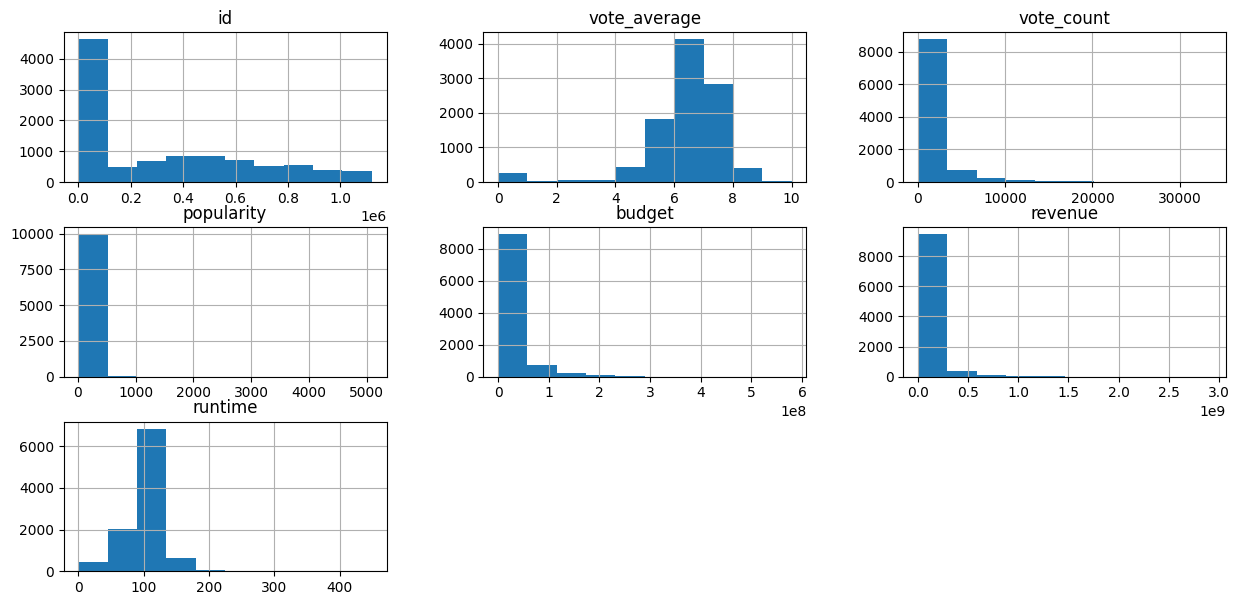

In [175]:
df.hist(figsize=(15,7))
plt.xlabel('xlabel', fontsize=7)
plt.ylabel('ylabel', fontsize=7);

__Первое впечатление о данных__

- В фрейме 14 колонок и 10 тыс строк

- Названия  колонок понятные, кроме tagline (подзаголовок) - переименуем в film_phrase, также для удобства работы переименую   original_language, production_companies, release_date.

- release_date -  в фрейме  в виде object, переведем в тип datetime.

- id   фильма  не несет смысловой нагрузки  на первый взгляд для последующего анализа,  но  индификатор присваивался  сервисом скорее всего  по мере выхода фильмов на экраны - посмотрим сколько уникальных id  и  названий фильмов.  

- budget/revenue - очень большие числа, переведем их в удобочитаемые


- Есть пропуски в   release_date  и overview  -  если несущественные, то от данных по некоторым фильмам  с этими  пропусками избавиться  без  вреда для последующего анализа. к тому же даты нужны для анализа, без них не сможем сказать существенное и корректное по  имеющимся данным, заполнять пропуски сможем если есть  много  дополнительного времени по поиску  Интернете, посчитаем что времени нет или информация недомтупна.

- Данные в колонках genres и  production_companies указаны в  виде списка, избавимся от них, нужно  будет работать с категориями фильмов.

- добавим колонку  по году выпуска (отдельно)

в загрузочных данных неявных дубликатов нет


___

#Предобработка

In [176]:
df = df.rename(columns = {'tagline':'film_phrase', 'production_companies':'productions','original_language':'language'})  #переименуем колонки
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')#перевеведем в вид даты

df['genres'] = df['genres'].apply(lambda x: x.replace('[','').replace(']','')) # здесь и  далее в  колонках избавимся от []
df['productions'] = df['productions'].apply(lambda x: x.replace('[','').replace(']',''))
df['genres'] = df['genres'].str.replace("'", "") # здесь и  далее в  колонках избавимся от '
df['productions'] = df['productions'].str.replace("'", "")



In [177]:
df['budget'] = df['budget']/1000 # отформатируем  большие значения для удобства чтения - округлим  значения до тысячных
df['revenue'] = df['revenue']/1000

In [178]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year  # добавим колонку с  годом  выпуска отдельно

In [179]:
print(f"Представлены  фильмы с  известным релизом:  с{df.release_date.min()}  по {df.release_date.max()}")

Представлены  фильмы с  известным релизом:  с1902-04-17 00:00:00  по 2028-12-20 00:00:00


In [180]:
df = df.dropna(subset=['release_date','overview']) # удаляем  пропущенные значения по колонкам


In [181]:
print(f"После удаления  строк  c отсутствущими данными по колонкам  : 'release_date','overview', осталось {len(df)} стр.")

После удаления  строк  c отсутствущими данными по колонкам  : 'release_date','overview', осталось 9905 стр.


In [182]:
10000-9905

95

 Удалили менее 1 процента данных

In [183]:
print(f"После удаления остались фильмы с {df.release_date.min()}  по {df.release_date.max()}  гг.")

После удаления остались фильмы с 1902-04-17 00:00:00  по 2026-04-29 00:00:00  гг.


In [184]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year  # добавим колонку с  годом  выпуска отдельно

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9905 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            9905 non-null   int64         
 1   title         9905 non-null   object        
 2   release_date  9905 non-null   datetime64[ns]
 3   genres        9905 non-null   object        
 4   language      9905 non-null   object        
 5   vote_average  9905 non-null   float64       
 6   vote_count    9905 non-null   int64         
 7   popularity    9905 non-null   float64       
 8   overview      9905 non-null   object        
 9   budget        9905 non-null   float64       
 10  productions   9905 non-null   object        
 11  revenue       9905 non-null   float64       
 12  runtime       9905 non-null   int64         
 13  film_phrase   7240 non-null   object        
 14  release_year  9905 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int6

 - перевели в вид datetime   колонку дат
 - часть колонок переименовали
 - удалили часть  отстутствующих данных по 2 колонкам - менее 1 % от всех данных, осталось 9905 записей
 - создали перечень для дальнейшей работы по жанрам фильмов и продюсерским компаниям
 - отработали  количественные данные в  бюджете и  доходе - раздели данные на 1000 - теперь  удобнее считать в тысячах.
 - выяснили  точные  даты  фильмов - как ранее выпущенных так и будущих релизов с 1902-04-17   по 2026-04-29 гг. по уже несколько урезанному  df
 - отдельно добавили колонку по году релиза
 - колонка film_phrase  малозначима, не будем ее удалять.   
 ___

#Исследовательский анализ данных

In [186]:
df.columns

Index(['id', 'title', 'release_date', 'genres', 'language', 'vote_average',
       'vote_count', 'popularity', 'overview', 'budget', 'productions',
       'revenue', 'runtime', 'film_phrase', 'release_year'],
      dtype='object')

In [187]:
df.sample(3)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
9014,796765,Bantú Mama,2022-11-17,Drama,Spanish,5.3,3,8.583,A French woman of African descent manages to e...,0.0,"Aurora Dominicana, Basecamp Studio, Point Barr...",0.0,77,A contemporary tale about a different kind of ...,2022
6922,880100,Fear,2023-01-27,Horror,English,5.1,9,13.690,A group of friends gather for a much-needed we...,0.0,Hidden Empire Film Group,2100.0,98,Your mind is the trap.,2023
966,240,The Godfather Part II,1974-12-20,"Drama, Crime",English,8.6,10802,55.942,In the continuing saga of the Corleone crime f...,13000.0,"Paramount, The Coppola Company",102600.0,202,"I don't feel I have to wipe everybody out, Tom...",1974


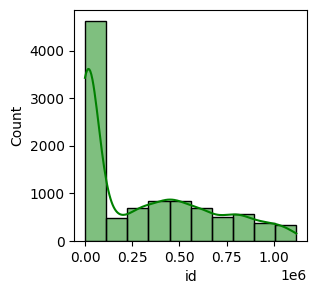

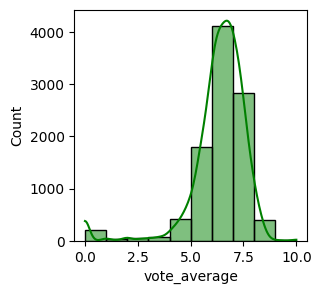

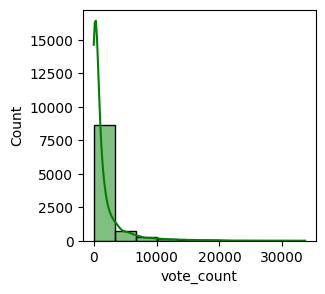

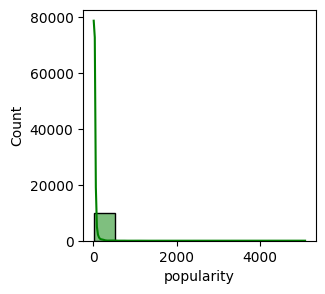

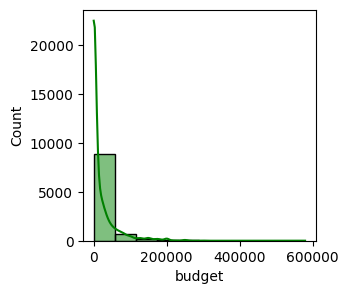

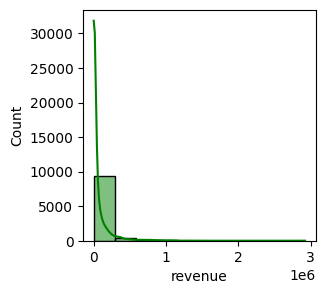

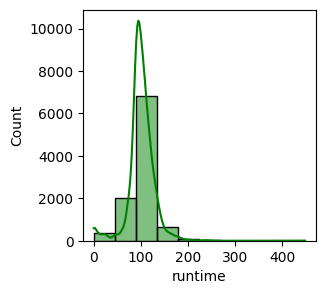

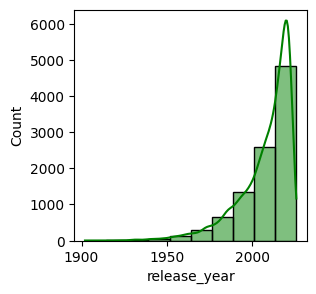

In [188]:
col_list = ['id', 'vote_average', 'vote_count', 'popularity',  'budget',  'revenue', 'runtime', 'release_year']

for feature in col_list:
  plt.figure(figsize = (3,3))
  sns.histplot(df[feature], bins = 10, kde=True, color = 'green')
  plt.show();

- средний рейтинг   от 0 до 10 -  довольно много  от 0 до 1 - в  данных не только высокорейтинговые  произведения, более 4 тыс.  записей со средним рейтингом - 6, крайне мало с рейтингом 10,1-2.
- отметим  что  не сильно хотят голосовать. бОльшая част - это  до 3,5 тыс. проголосовавших, но конечно заметим и что бывают  уникальные фильмы с кол-ом голосований более  30 тыс.
- бюджет - есть и ОЧЕНЬ дорогие фильмы с бюджетом  около 600 млн. но конечно подавляющяя часть  и высокая плотность данных вокруг 50-70 млн долларов
- превалируют фильмы с  доходом  менее четверти  миллиарда долларов, максимум доход немного не добрал до 3 млрд. долларов.
- выходят  произведения по времени - 100-125   минут  чаще, но видим что есть и  400 минутные, скорее всего это сериалы, мини-сериалы
- и  видим что  чем ближе к современности  тем больше  выходит фильмов, но заметен спад  в самом конце что наложили медицинские ограничения в период  заболеванием covid.


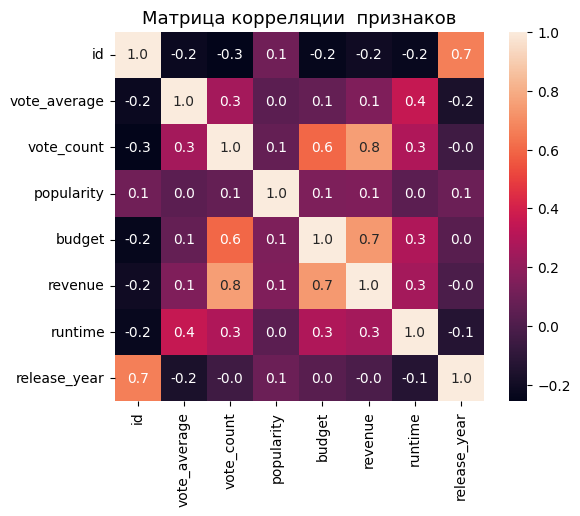

In [189]:
sns.heatmap(df.corr(),square = True, annot = True, fmt=".1f")
plt.title('Матрица корреляции  признаков', fontsize=13);

__Смотрим на Линейную взаимосвязь предоставленных данных по колонкам__:

- Количество голосовавших  сильно коррелирует с  общим доходом фильма. Логично - большее кол-просмотров фильма  = бОльшее количество отзывов и  увеличение  прибыли от фильма.
- Бюджет на производство фильма  интересен для стимула просмотра -  количество проголосовавших -есть корреляция.
- Бюджет коррелирует с доходом.

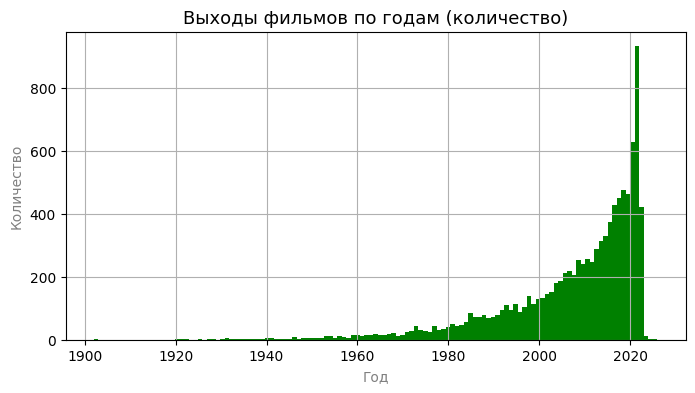

In [190]:
# какое количество фильмов по годам в целом  представлено в  ДФ(датафрейме)?
plt.figure(figsize = (8,4))
df.release_year.hist(color = 'green',bins =  125)
plt.title('Выходы фильмов по годам (количество)', fontsize=13)
plt.xlabel('Год', color='gray')
plt.ylabel('Количество',color='gray');

In [191]:

count_releases = df.groupby('release_year')['release_year'].agg('count')
print(count_releases)

print(f'Максимальное количество выпускоп по данным платформы: {count_releases.max()}')

release_year
1902      1
1920      1
1921      1
1922      1
1925      1
       ... 
2022    931
2023    422
2024     12
2025      2
2026      1
Name: release_year, Length: 104, dtype: int64
Максимальное количество выпускоп по данным платформы: 931


1900- ые были началом  эры кинематографии, постепенно объемы  возрастали. С 1980 года  можно отметить  существенный подъем с пиком в районе
до Пандемии, а на будущие  выпуски  сильно повлияли простои и  неясности в кинопроизводстве. Напомню  что  после съемок через  приличный промежуток времени (порой   более года) идет обработка и подгонка материалов перед выходом на экран.  2022 г  был серьезно на пике - еще  были  в производстве снятые  до 2019 гг материалы.
___

##Разделение данных
На 2 части - по 2023 г. Фильмы которые уже просмотрели и есть средний рейтинг проголосовавших и  еще не  имеющие средний рейтинг (фильмы не просмотрены) - посмотрим  будут ли отличаться тенденции

In [192]:
df_new = df[(df['release_year']>= 2023) & (df['vote_average'] == 0)] # будущие релизы - год выхода 2023 и  нет даннхе по среднему рейтингу т.к. еще нзрители не видели фильм


In [193]:
len(df_new)

154

In [194]:
df_last = df[~df.index.isin(df_new.index)]
len(df_last)

9751

In [195]:
df_last.release_year.max()

2023

In [196]:
154+9751


9905

In [197]:
len(df) #провели проверки - данные  разделены корректно

9905

In [198]:
print(f' Количество фильмов  уже вышедших на экран: {len(df_last)}')
print(f' Планируемые к  выходу на экран: {len(df_new)} фильмов')

print(f' Общее количество  записей  до разделения на части: {len(df_last)+len(df_new)}')

 Количество фильмов  уже вышедших на экран: 9751
 Планируемые к  выходу на экран: 154 фильмов
 Общее количество  записей  до разделения на части: 9905


Корректно  разбили данные по датам, взяв за основу март-апрель 2023 гг

##Рассмотрим Вышедшие  ранее фильмы детальнее.




In [199]:
df_last.sample(2)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
3231,20760,Lilo & Stitch 2: Stitch Has a Glitch,2005-01-22,"Animation, Family, Comedy, Science Fiction",English,6.6,1239,27.425,"Now, we find the rowdy extraterrestrial gettin...",0.0,"Disney Television Animation, DisneyToon Studio...",0.000,68,NaN,2005
3617,271718,Trainwreck,2015-07-17,"Comedy, Romance",English,5.8,2392,26.826,Having thought that monogamy was never possibl...,35000.0,"Universal Pictures, Apatow Productions, Fuji T...",140795.793,125,We All Know One.,2015


__Уточним детали - сколько  всего уникальных  id  портала  и названий  фильмов__

In [200]:
display(f"Уникальных id фильмов - {len(df_last['id'].unique())}")

display(f"Уникальных названий фильмов - {len(df_last['title'].unique())}")

display(f"Разница - {len(df_last['id'].unique()) - len(df_last['title'].unique())}")


'Уникальных id фильмов - 9751'

'Уникальных названий фильмов - 9414'

'Разница - 337'

__Рассмотрим  нет ли ошибки в id фильмов - названий меньше  чем количество id фильмов__

In [201]:
unique_names = df_last.title.value_counts().reset_index() #составим список всех названий фильмов  в df_last
names = unique_names[unique_names['title']>=2] # оставим названия которых больше  или равные 2-ум
names = names.rename(columns={"index":'title', 'title':'counts'}) #переименуем колонки


In [202]:
names

,title,counts
0,Cinderella,5
1,Prey,4
2,Beauty and the Beast,4
3,The Kid,3
4,Porno,3
...,...,...
301,Close,2
302,Miracle in Cell No. 7,2
303,X,2
304,The Enforcer,2


In [203]:
names.counts.sum()

643

Неоднократно некоторые фильмы (308 шт)  переснимали. В целом оказалось 643  ленты. Какие-то произведения  снимали 2 раза, Золушку   повторяли 5 раз,Красавицу и чудовище - 4 раза. Также вероятно что в списке есть и одноименные произведения  но с разным контекстом, но скорее всего кинокомпании переснимают популярные  произведения.  

In [204]:
df_last[df_last['title'] =='Cinderella'] # на примере Золушки  посмотрим  кто и когда снимали  ленты


,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
566,11224,Cinderella,1950-02-22,"Family, Fantasy, Animation, Romance",English,7.0,6054,73.639,Cinderella has faith her dreams of a better li...,2900.0,Walt Disney Productions,263591.415,74,The greatest love story ever told.,1950
694,150689,Cinderella,2015-03-12,"Romance, Fantasy, Family, Drama",English,6.8,6538,55.735,"When her father unexpectedly passes away, youn...",95000.0,"Walt Disney Pictures, Genre Films, Beagle Pug ...",543514.353,105,Midnight is just the beginning.,2015
2729,593910,Cinderella,2021-09-03,"Fantasy, Romance, Comedy",English,6.4,1208,19.404,"Cinderella, an orphaned girl with an evil step...",0.0,"Fulwell 73, Columbia Pictures",0.000,113,One shoe to rule them all.,2021
6574,261985,Cinderella,2011-10-30,"Family, TV Movie, Fantasy, Romance",Italian,6.8,70,12.162,Once upon a time in post-war Rome: 13-year old...,0.0,"Beta Film, Lux Vide, 13 Productions, ARD, RAI",0.000,180,NaN,2011
9026,25892,Cinderella,1965-02-22,"Fantasy, Romance, TV Movie, Music",English,6.1,38,10.272,After the success of the live 1957 Cinderella...,0.0,CBS Studios,0.000,78,"TV-version of the classic fairy tale, set to a...",1965


In [205]:
df_last[df_last['title'] =='Cinderella']['vote_average'].agg(['min','max'])

min    6.1
max    7.0
Name: vote_average, dtype: float64

Первое произведение было выпущено в 50-г  и в прокате  заняло   средний рейтинг 7 - очень хорошие показатели с учетом того что не бло интернет-платформ для широкого охвата - зрители  высоко оценили произведение. Если цифры   в бюджете и  выручке не врут, то  при  расходе в 2,9 млн, 263,6 млн принесло прибыли.
Ясно  что популярность произведения вскружило голову.
 с 80-х Годов  Walt Disney Productions создавал новые подразделения, см. Википедию <https://en.wikipedia.org/wiki/The_Walt_Disney_Company> поэтому далее будем считать что это разные   бизнесы (не будем объединять в Холдинг)  и уже в 2015 году на  успехе предшественницы  - 1  Золушки повторили  достижения   и в рейтинге(6,8) и  в ошеломляющей прибыли в  543,5 млн при   затратах в 95 млн.

 К сожалению данных  по фин. показателям других 3 Золушек  в этом датафрейме нет, (1965, 2011 и 2021 года) но видим притяжение  зрителей.
 Заметим продолжительность лент - от старта  с 74 минуты до телефильма (как оказалось, сериала с сезонами - 180 минут)

In [206]:
names_list = names['title'].to_list() #создадим список всех неуникальных названий фильмов
len(names_list) #проверка на количество

306

In [207]:
names_no_unique  = df_last.query('title in @names_list')
len(names_no_unique) #снова проверка на количество

643

In [208]:
names_no_unique

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
30,1033219,Attack on Titan,2022-09-30,"Action, Science Fiction",English,6.0,125,525.410,"As viable water is depleted on Earth, a missio...",0.0,"The Asylum, Emerald City Films",0.000,93,The battle for Earth has begun.,2022
40,1023313,The Exorcist,2022-11-02,Horror,Spanish,5.8,76,390.589,"Ophelia, a young nun recently arriving in the ...",0.0,BTF media,0.000,101,NaN,2022
48,840326,Sisu,2023-01-27,"War, Action",Finnish,7.1,36,455.546,"Deep in the wilderness of Lapland, Aatami Korp...",6200.0,"Subzero Film Entertainment, Good Chaos, Stage ...",6603.810,91,Vengeance is golden.,2023
65,766507,Prey,2022-08-02,"Thriller, Action, Science Fiction",English,7.8,5444,267.138,"When danger threatens her camp, the fierce and...",65000.0,20th Century Studios,0.000,100,They hunt to live. It lives to hunt.,2022
69,736526,Troll,2022-12-01,"Fantasy, Action, Adventure, Thriller",Norwegian,6.7,1373,261.895,"Deep inside the mountain of Dovre, something g...",0.0,Motion Blur,0.000,104,Mountains will move.,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,648,Beauty and the Beast,1946-10-29,"Drama, Fantasy, Romance",French,7.5,510,11.529,The story of a gentle-hearted beast in love wi...,0.0,Andre Paulve Film,0.000,96,Once upon a time…,1946
9911,17015,Persuasion,1995-05-01,"Drama, Romance",English,7.1,115,11.527,"Anne Elliot, the daughter of a financially tro...",0.0,BBC Film,0.000,104,"A love lost, but never forgotten in this new B...",1995
9963,11236,The Secret Garden,1993-08-13,"Drama, Family, Fantasy",English,7.4,795,12.771,A young British girl born and reared in India ...,0.0,"American Zoetrope, Warner Bros. Pictures, Warn...",0.000,102,The timeless tale of a special place where mag...,1993
9968,8398,The Hitcher,2007-01-19,"Action, Horror, Crime, Thriller",English,5.9,810,14.272,While driving through the New Mexico Desert du...,10000.0,"Intrepid Pictures, Platinum Dunes, Focus Features",25399.945,84,Never pick up strangers.,2007


_количество  фильмов в целом которые время от времени переснимают - 643 шт_

__какие  года пересъемки (минимум и максимум), средний  среднего рейтинга, а также минимум до максимум рейтинга__

In [209]:
names_not_unique = names_no_unique.groupby('title').agg({'release_year':['min','max','count'],
                                                 'vote_average':['min','max','mean']}) #выборка на основе неуникальных называний лент
                                                                                       #по годам выпуска,  рейтингам

names_not_unique.columns  = ['_'.join(col) for col in names_not_unique.columns] #уберем мультииндекс
names_not_unique=names_not_unique.sort_values('release_year_count', ascending = False).reset_index()
names_not_unique       #отсортируем по убыванию   года выпуска



,title,release_year_min,release_year_max,release_year_count,vote_average_min,vote_average_max,vote_average_mean
0,Cinderella,1950,2021,5,6.1,7.0,6.620
1,Prey,2007,2022,4,4.7,7.8,5.975
2,Beauty and the Beast,1946,2017,4,6.1,7.7,7.075
3,Fallen,1998,2016,3,6.1,6.9,6.600
4,Godzilla,1954,2014,3,5.6,7.6,6.500
...,...,...,...,...,...,...,...
301,Heist,2001,2015,2,6.1,6.3,6.200
302,Halloween II,1981,2009,2,5.4,6.6,6.000
303,Hairspray,1988,2007,2,6.7,6.9,6.800
304,Hacker,2016,2019,2,6.3,6.7,6.500


__построим график  - как часто  экранизируют фильмы__

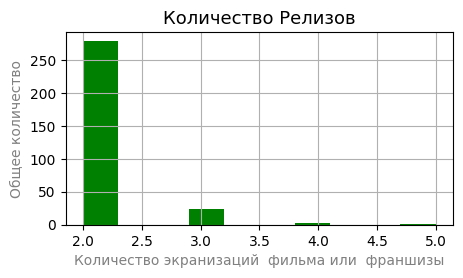

In [210]:

names_not_unique.hist('release_year_count', figsize=(5,2.5), color = 'green')
plt.title('Количество Релизов', fontsize=13)
plt.xlabel('Количество экранизаций  фильма или  франшизы', color='gray')
plt.ylabel('Общее количество',color='gray');

в основном экранизируют по 2 раза один фильм. совсем редко - 5 экранизаций  

In [211]:
names_no_unique.groupby('genres')['genres'].agg('count')

genres
                                                          1
Action                                                    2
Action, Adventure                                         2
Action, Adventure, Animation, Fantasy, Science Fiction    1
Action, Adventure, Comedy                                 2
                                                         ..
Western, Action, Adventure                                1
Western, Drama, Action                                    1
Western, Drama, Action, Romance                           1
Western, Drama, Thriller                                  1
Western, Thriller                                         1
Name: genres, Length: 335, dtype: int64

Всего возможных комбинаций  видов жанров - 332


---



выделим каждый жанр из описаний к фильмам и посмотрим как часто он встречается

####создадим функцию для  дальнейшего использования для вывода кол-ва жанров  в %

In [212]:
def pie_genre(df):                  # выделим каждый жанр из описаний к фильмам и посмотрим как часто он встречается
  list_genres_df = df.genres.to_list() #Приведем  данные колонки  жанра из  Series в  вид list


  combined_list = []
  for item in list_genres_df:
      combined_list.extend(item.split(', ')) # т.к. несколько категорий жанров в описании одного фильма, объединим все списки описания
                                            #   в один

  c = collections.Counter(combined_list) # создадим словарь по типу  ключ- жанр, значение -  их количество   в списке

  count_cat_film_last = pd.DataFrame(list(c.items()), columns=['Category', 'Count']) #создадим  ДФ

  count_cat_film_last=count_cat_film_last[count_cat_film_last['Category'] != ''].set_index('Category') #удалим пустоты - возможно проблемы при парсинге

  count_cat_film_last = count_cat_film_last.astype(int).plot(kind='pie', y='Count', shadow=True, figsize=(7,7), startangle = 20, legend = False, fontsize=8, autopct='%1.0f%%')
                                                                                    # создадим  pie _plot  для визуализации

  plt.title('Жанры фильмов  и частота упоминания')
  plt.show();

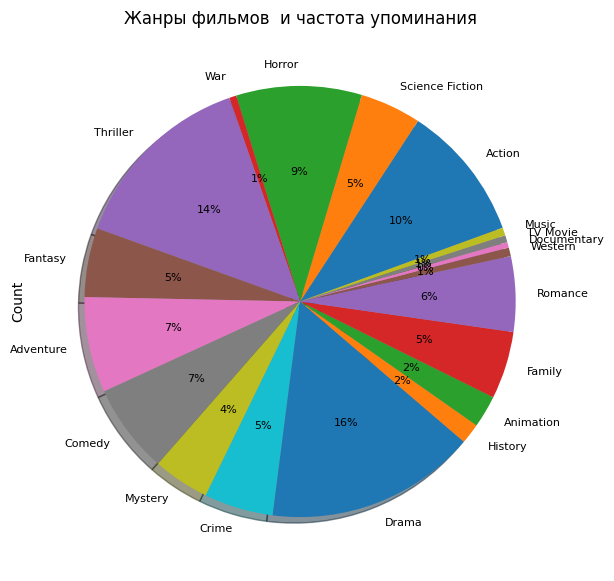

In [213]:
pie_genre(names_no_unique)



В описании фильмов среди  жанров тех фильмов которые любят переснимать выделяются: Драма - 15 %, Комедии - 11 %, Экшены/Триллеры - 10%.

Примечательно что   самые  частые экранизации романтические/фантазийные/для семейного просмотра  фильмы  по  характеристикам не так  сильно встречаются в описании   - всегопо 5 процентов.

_помним что мы оцениваем фильмы  - ремейки!  фильмы же  могут характеризоваться одинаково!!_


-  кинемотографисты  переснимают  произведения  с начала эпохи кинематографа - идеи до  сих пор актуальны
- интересно какое произведение среди них  самое возрастное?

In [214]:
names_not_unique['release_year_min'].min() #среди экранизаций по годам- самый ранний год

1921

In [215]:
names_not_unique[names_not_unique['release_year_min'] == names_not_unique['release_year_min'].min()]

,title,release_year_min,release_year_max,release_year_count,vote_average_min,vote_average_max,vote_average_mean
8,The Kid,1921,2019,3,5.9,8.2,6.866667


_«Малыш» (англ. The Kid) — американский немой семейный фильм 1921 года, первая полнометражная режиссёрская работа Чарльза Чаплина, занявшая второе место по кассовым сборам в 1921 году._


<https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D1%8B%D1%88_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_1921)>

Кинодеятели часто пользуют более ранние  фильмы (самый старый из  представленных данных - 1921 гг) и  по новому  снимают на  волне  успехов предшественников. Экранизовать любят фильмы,  как видим по :Cinderella,Beauty and the Beast, Shaft - с довольно хорошими средними рейтингами (выше 5) - теми  фильмами которые пользуются популярностью.
Добавим что  и варианты экранизаций   одного произведения могут отличаться  по годам, жанрами  и языкам.

In [216]:
df_last[df_last['title'] == 'The Kid']

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
3788,4244,The Kid,2000-07-07,"Fantasy, Comedy, Family",English,6.5,824,21.052,Powerful businessman Russ Duritz is self-absor...,65000.0,"Walt Disney Pictures, Chester Films Inc., Junc...",110317.580,104,Nobody ever grows up quite like they imagined.,2000
8337,10098,The Kid,1921-01-21,"Comedy, Drama",English,8.2,1798,12.684,A tramp cares for a boy after he's abandoned a...,250.0,Charles Chaplin Productions,2500.000,68,6 reels of Joy.,1921
9707,492565,The Kid,2019-03-08,"Western, Drama, Action",English,5.9,253,12.060,"New Mexico Territory, 1880. Rio Cutler and his...",8000.0,"Suretone Pictures, Mimran Schur Pictures",1561.698,100,It only matters the story they tell when you'r...,2019


In [217]:
df_last[df_last['id'] == 5]


,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
5851,5,Four Rooms,1995-12-09,"Crime, Comedy",English,5.8,2357,18.734,It's Ted the Bellhop's first night on the job....,4000.0,"Miramax, A Band Apart",4257.354,98,Twelve outrageous guests. Four scandalous requ...,1995


выяснили что The Kid один из первых  фильмов, но id у него  не наименьший

___


__посчитаем кол-во выпущенных фильмов по годам__

_вернемся к df_last_

In [218]:
count_old_films = df_last.groupby('release_year')['id'].count().reset_index()
count_old_films = count_old_films.rename(columns = {'id':'count'})

In [219]:
count_old_films

,release_year,count
0,1902,1
1,1920,1
2,1921,1
3,1922,1
4,1925,1
...,...,...
96,2019,475
97,2020,461
98,2021,629
99,2022,931


In [220]:
                                                                              # строим график  с динамикой
fig = px.bar(count_old_films, x = 'release_year', y = 'count',  color='count',
                              title= "Динамика количества выпущенных фильмов в период с 1902  по 2023  гг. ")
fig.show();

По графику видан  динамика - увеличивается выпуск фильмов начиная с 80-90хх годов и достигает максимума  в 2022 году - 931 фильм.

__на каких языках выпускались фильмы  и как часто  представлены они  на платформе?__

In [221]:
languages_releases = df_last.groupby('language')['id'].agg('count').sort_values(ascending = False).reset_index()
languages_releases

,language,id
0,English,7098
1,Japanese,693
2,Korean,381
3,Spanish,334
4,French,291
5,Chinese,147
6,Italian,147
7,cn,134
8,German,82
9,Russian,67


In [222]:

languages_releases = languages_releases.rename(columns = {'id':'count'}).sort_values(by = 'count',ascending = True)

In [223]:
fig = px.bar(languages_releases, x = 'language', y = 'count',  color='count',
                              title= "Мировые языки на которых  снимались фильмы")
fig.show();


Как и ожидалось: на платформе  на Английском   языке  выходит фильмов подавляющее большинсво English -7098, следующий по  интенсивности  - японский Japanese  -   693 и примечательно что  почти на одном уровне  выходят фильмы на китайском и кнатонском языках (147/134).

На русском языке фильмы представлены в колв-ве  67 шт.


_cn - язык кантонский
Кантонский также употребляется жителями Гонконга и Макао в повседневной жизни. В странах с традиционно высоким числом китайского населения (Канада, Перу, Панама, США, Австралия) местные китайцы сохраняют говоры родины своих предков: эмигранты из окрестностей Гуанчжоу говорят на кантонском._
- Panjabi                1 кинолента..
- Norwegian Bokmal       1
- Macedonian             1
- Irish                  1
- Estonian               1
- Dzongkha               1
- sh  

  Dzongkha       официальный язык Королевства Бутан, а sh	 - обозначен сербский язык
  

__Какие жанры упоминаются в описании в df_last__

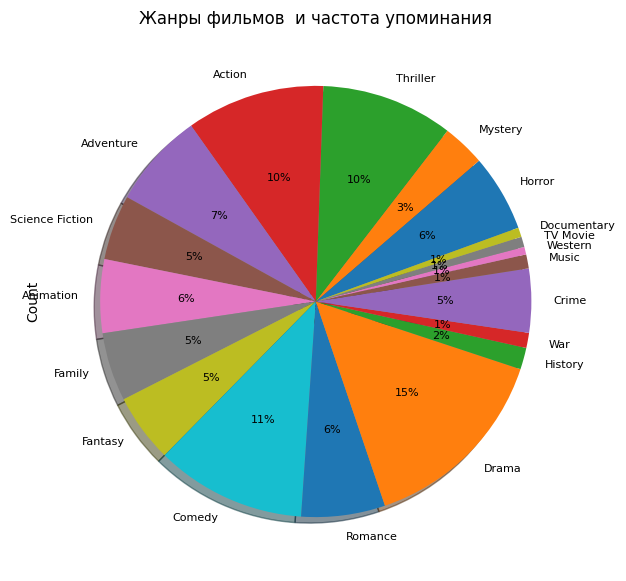

In [224]:
pie_genre(df_last)

Максимум - Драма - 15 %, Комедия - 11 %,Экшен и триллеры по 10 % ,а менее всего по 1% упоминаются : Документалистика, Музыкальные фильмы, Вестерны, Война, Телевизионные фильмы.

In [225]:
print(f"Средний рейтинг киноленты: от  {df_last.vote_average.min()} - до  {df_last.vote_average.max()}")

Средний рейтинг киноленты: от  0.0 - до  10.0


_разделим  голоса на 5  частей - посмотрим какие фильмы занимают врехние позиции и в целом распределение по градациям  рейтингов_

In [226]:
df_last['vote_average_cut'] = pd.cut(df_last['vote_average'], bins=5)

<ipython-input-226-95cdd69bb1c4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
research_vote = df_last.groupby('vote_average_cut')['id'].count()
research_vote

vote_average_cut
(-0.01, 2.0]     104
(2.0, 4.0]       121
(4.0, 6.0]      2537
(6.0, 8.0]      6694
(8.0, 10.0]      295
Name: id, dtype: int64

6694 фильмов  имеют средний рейтинг  от 6 до 8 баллов, 104 фильмов с самым низким рейтингом от 0 до 2, максимум  баллов  имеют 295 фильма
___
__построим график__

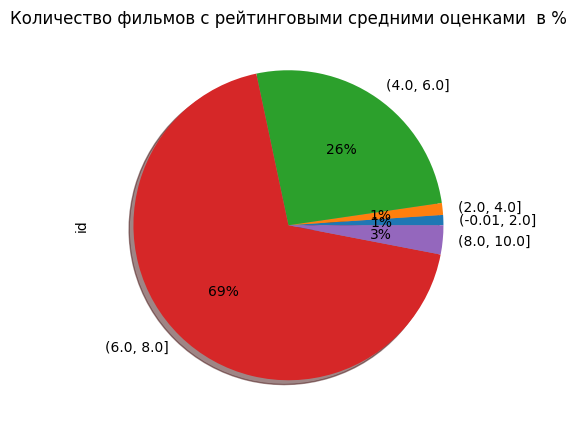

In [228]:
research_vote.reset_index().rename(columns = {'id':'count'}) #переведем в ДФ

plt.figure(figsize = (5,8))
research_vote.plot(kind='pie', y='count',  shadow=True,  startangle=0,autopct='%1.0f%%')
plt.title('Количество фильмов с рейтинговыми средними оценками  в %')
plt.show();


максимум фильмов  на площадке со средним  рейтингом  6-8 баллов (69 %), далее идут ленты  от 4-6 баллов и минимум  количества 0-2 балльных фильмов.


_Предполагаю что колонка vote_count не сильно влияет на исследование данных -всего  лишь количество проголосовавших  на основе которых  рассчитывается средний рейтинг фильма_

поэтому  не  будем вовлекать  ее в дальнейший анализ

___

__рассмотрим popularity__

In [229]:
print(f"Минимальные данные по popularity: от  {df_last.popularity.min()} - до  {df_last.popularity.max()}")

Минимальные данные по popularity: от  7.367 - до  5089.969


popularity - модель специфичная для  платфоры основанная на:

Количество голосов за день,
Количество просмотров за день,
Количество пользователей, которые отметили его как «избранное» за день
Количество пользователей, которые добавили его в свой "список наблюдения" за день
Дата выпуска
Общее количество голосов
Оценка за предыдущие дни

_также разобьем  эту метрику на 5 корзин - увидим есть ли тенденции_

In [230]:
 df_last['popularity_bins'] = pd.cut(df_last['popularity'],bins = 5)

<ipython-input-230-354b6f678ab6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [231]:
 df_last.groupby('popularity_bins')['release_year'].count()

popularity_bins
(2.284, 1023.887]       9735
(1023.887, 2040.408]       9
(2040.408, 3056.928]       4
(3056.928, 4073.449]       1
(4073.449, 5089.969]       2
Name: release_year, dtype: int64

крайне специфичный признак - всего 16 фильмов не входят  в 1   часть  "корзины"
___
почему такая градация? может  в последнее время расчет  этого рейтинга поменялся?

In [232]:
df_last.query('popularity  <1023.887')['release_year'].agg(['count', 'min', 'max'])


count    9735
min      1902
max      2023
Name: release_year, dtype: int64

все  периоды входят  в  низшую лигу  "корзины" - не подтвердилась идея  что принцип построения модели рейтинга платформы претерпевала изменения в последнее время.


---


посмотрим какие же характеристики у популярных фильмом  мнению TMBd:

In [233]:
most_popularity = df_last[df_last['popularity']  >=1023.887]
most_popularity.agg({'vote_average':['min','max','mean'],
                     'budget':['min','max','mean'],
                     'revenue':['min','max','mean'],
                     'runtime':['min','max','mean']})

,vote_average,budget,revenue,runtime
min,5.9000,0.0,0.000000e+00,92.0000
max,8.3000,460000.0,2.319332e+06,192.0000
mean,7.3125,100562.5,3.757203e+05,124.5625


- средний рейтинг наиболее популярных фильмов  высокий:среднее 7,31
- бюджет в среднем 100,6 млн долларов
- средний доход 376 млн
- средний хронометраж 125 мин.
___

Узнаем названия этих популярных фильмов:

In [234]:
most_popularity.title #Названия фильмов

0                         The Pope's Exorcist
1           Ant-Man and the Wasp: Quantumania
2                 The Super Mario Bros. Movie
3                                     Ghosted
4                    Shazam! Fury of the Gods
5                    Avatar: The Way of Water
6            Guardians of the Galaxy Volume 3
7                                   Scream VI
8                                   Creed III
9     Dungeons & Dragons: Honor Among Thieves
10     The Last Kingdom: Seven Kings Must Die
11                          Peter Pan & Wendy
12                       John Wick: Chapter 4
13                             Evil Dead Rise
15               Puss in Boots: The Last Wish
17                                        AKA
Name: title, dtype: object

только один Аватар вошел в перечень популярных с позиции TMBD  - найдем все  ленты этой линии

In [235]:
len(most_popularity)

16

In [236]:
df_last[df_last['title']=='Avatar']

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
130,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",English,7.6,29040,188.103,"In the 22nd century, a paraplegic Marine is di...",237000.0,"Dune Entertainment, Lightstorm Entertainment, ...",2923706.026,162,Enter the world of Pandora.,2009,"(6.0, 8.0]","(2.284, 1023.887]"


In [237]:
df_last[df_last['title']=='Avatar: The Way of Water']



,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
5,76600,Avatar: The Way of Water,2022-12-14,"Science Fiction, Adventure, Action",English,7.7,7853,2280.912,Set more than a decade after the events of the...,460000.0,"20th Century Studios, Lightstorm Entertainment",2319331.58,192,Return to Pandora.,2022,"(6.0, 8.0]","(2040.408, 3056.928]"


Получили подтверждение идеи что  popularity	 очень специфичный показатель.

__Выделим жанры наиболее популярных фильмов__

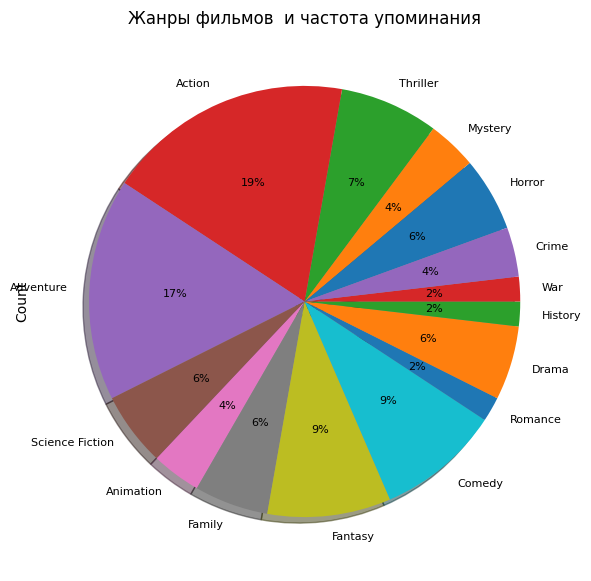

In [238]:
pie_genre(most_popularity)

Экшен - 19%, Приключения - 17 %, Комедии 9 % , военная тематика, драма и история  в описании фигурирует только в 2 %

In [239]:
print(f'Годы выпусков фильмов в most_popularity с: {most_popularity.release_year.min()} по {most_popularity.release_year.min()} гг.')

Годы выпусков фильмов в most_popularity с: 2022 по 2022 гг.


какие фильмы были позицонированы как наиболее  рейтинговые:
- фильмы  выпущенные в 22-23 году
- на английском  языке
- средний проголосовавший зрителями рейтинг 6.6-8.3
- бюджет максимум 460 млн долл.
- доход  более 2 миллиардов (максимум
- время ленты от 91- до 192 минут
- приключения  и экшен- 17%, комедии -14 % , менее всего - Семейные  анимация, Хорор и Мистика - 3%


 Это: последний Аватар, John Wick: Chapter 4, Кот в сапогах, Creed III  - is a 2023 American sports drama film - т.е. самые новые но в то же время рейтинговые  произведения. В то же время некоторые в России  ленты наверное не очень изветны и популярны: к примеру Загадочное убийство 2.

__Обратим внимание на бюджет  фильмов__

In [240]:
df_last['budget'].describe()

count      9751.000000
mean      19717.973771
std       38582.102217
min           0.000000
25%           0.000000
50%        1000.000000
75%       23000.000000
max      579330.426000
Name: budget, dtype: float64

средние показатели по бюджету - 1 млн и максимум  - 579 млн.

___

__посмотрим   на ленту за 579 млн.долл__

In [241]:
df_last[df_last['budget'] > 579330] #интересные данные - посмотрим на максимальные значения

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
5649,460555,Operation Red Sea,2018-02-16,"Action, Thriller, War, Drama",Chinese,7.1,219,15.803,A squad of the Jiaolong Commando Unit - Sea Dr...,579330.426,"Bona Film Group, The P.L.A Navy Government TV ...",579220.56,139,NaN,2018,"(6.0, 8.0]","(2.284, 1023.887]"


Посмотрим в интернете данные:
 <https://www.kinopoisk.ru/film/1044335/?utm_referrer=yandex.ru>  на Кинопоиске показатели иные:

$70 000 000 - бюджет фильма

$579 330 426 - сборы в мире

нужно поменять данные  иначе  эти аномальные значения могут изменить дальнейший анализ

т.к.  данные по прибыли очень приличные оставлю цифры и вручную поменяю значение в бюджете на верные


In [242]:
df_last.loc[5649, 'budget'] = 70000 # меняем сумму бюджета
df_last.loc[5649, :]  # проверка применения

id                                                             460555
title                                               Operation Red Sea
release_date                                      2018-02-16 00:00:00
genres                                   Action, Thriller, War, Drama
language                                                      Chinese
vote_average                                                      7.1
vote_count                                                        219
popularity                                                     15.803
overview            A squad of the Jiaolong Commando Unit - Sea Dr...
budget                                                        70000.0
productions         Bona Film Group, The P.L.A Navy Government TV ...
revenue                                                     579220.56
runtime                                                           139
film_phrase                                                       NaN
release_year        

In [243]:
df_last['budget'].describe() #Проверяем данные

count      9751.000000
mean      19665.740110
std       38166.943737
min           0.000000
25%           0.000000
50%        1000.000000
75%       23000.000000
max      460000.000000
Name: budget, dtype: float64

Максимальные данные по бюджету изменились  - теперь  это 460 млн. посмотрим на  ленту

In [244]:
df_last[df_last['budget'] ==460000]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
5,76600,Avatar: The Way of Water,2022-12-14,"Science Fiction, Adventure, Action",English,7.7,7853,2280.912,Set more than a decade after the events of the...,460000.0,"20th Century Studios, Lightstorm Entertainment",2319331.58,192,Return to Pandora.,2022,"(6.0, 8.0]","(2040.408, 3056.928]"



Теперь мы точно знаем  что 460 млн. стоило производство Аватар Путь воды
___

Минимальный бюджет составлял  в среднем - 1 млн долл.

т.к. со временем все дорожает на производство по годам

In [245]:
cm = sns.light_palette("green", as_cmap=True)

df_last.groupby('release_year')['budget'].agg(['min','max','mean','median','count']).style.background_gradient(cmap=cm)




,min,max,mean,median,count
release_year,,,,,
1902,5.985000,5.985000,5.985000,5.985000,1
1920,18.000000,18.000000,18.000000,18.000000,1
1921,250.000000,250.000000,250.000000,250.000000,1
1922,0.000000,0.000000,0.000000,0.000000,1
1925,923.000000,923.000000,923.000000,923.000000,1
1927,1300.000000,1300.000000,1300.000000,1300.000000,1
1928,0.000000,0.000000,0.000000,0.000000,1
1930,1448.864000,1448.864000,1448.864000,1448.864000,1
1931,0.000000,1500.000000,536.200000,355.000000,5


- сперва можем отметить тенденцию что до 50-хх   годов более тщательно велась запись  о бюджете  фильмов кинопортала,  после 41 года- минимум указан - "0" это произошло, скорее всего, из-за небольшого количества фильмов
-повышение  бюджета  (более зеленый оттенок начинается в 80-90-хх годах в локальным максимумом в 2022 году)
- в 2022 гг рекорд  и по количеству вышедших на экран фильмов.
> при  наличии рекорда в максимуме бюджета, среднее значение на этот года не распространяется! -признак того что  разброс   значений бюджетов очень большой

__Productions__

In [246]:
len(df_last.productions.unique())

7868

ситуация подобна жанрам - в одном фильме может быть несколько  компаний-продюсеров

In [247]:
names_no_unique.groupby('productions')['productions'].agg('count')

productions
                                                                                                                                                                            19
"Dawns Light", Rodin Entertainment, Underdogg Entertainment                                                                                                                  1
"Mels Cite du Cinema", Epsilon Motion Pictures, Franchise Pictures, Trackform Film Productions                                                                               1
20th Century Fox                                                                                                                                                             6
20th Century Fox, Davis Entertainment, Joseph M. Singer Entertainment                                                                                                        1
                                                                                                                 

Всего возможных комбинаций  продюсерских содружеств - 565


---



выделим каждую продюсерскую компанию и посмотрим как часто он встречается

__создадим функцию для вывода динамики  работы продюсерских компаний при создании фильмов__

In [248]:
def bar_productions(df):

  producers_list= df.productions.to_list()  #Приведем  данные колонки  жанра из  Series в  вид list

  combined_list = [] # соединим все названия компаний в один  список

  for item in producers_list:
      combined_list.extend(item.split(', ')) # т.к. несколько категорий  объединим все списки в один


  c = collections.Counter(combined_list) # создадим словарь по типу  ключ- компания, значение -  их количество   в списке

  count_producers_films = pd.DataFrame(list(c.items()), columns=['Producer', 'Count']) #создадим  ДФ
  count_producers_films=count_producers_films.sort_values(by = 'Count', ascending = False)

  # уберем пропуск  в 478 значений- скорее всего  проблема при парсинге
  count_producers_films['Producer'].replace('', np.nan, inplace=True)
  count_producers_films.dropna(subset=['Producer'], inplace=True)
  top_20_producers_films = count_producers_films.head(20) #оставим  первые 20  компаний
  # print(count_producers_films)
  # *выведем*  20 продюсерских компаний которые  чаще всего участвовали  в создании фильмов
  print(top_20_producers_films)
  fig = px.bar(top_20_producers_films, x = 'Producer', y = 'Count',  color='Count',    title= "20 активных продюсерских  компаний")
  fig.show();

In [249]:
bar_productions(df_last)


                    Producer  Count
16     Warner Bros. Pictures    488
8         Universal Pictures    470
22                 Paramount    374
60         Columbia Pictures    360
293         20th Century Fox    348
32      Walt Disney Pictures    220
38                 Lionsgate    196
23       Metro-Goldwyn-Mayer    184
13           New Line Cinema    182
475                   Canal+    139
213                     TOHO    131
62    Warner Bros. Animation    129
884         Relativity Media    112
367      DreamWorks Pictures    111
508              StudioCanal    105
234                  Miramax    102
1479          United Artists    100
717      Touchstone Pictures     96
36      Summit Entertainment     93
229         TriStar Pictures     92


In [250]:
df_last.head(1)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
0,758323,The Pope's Exorcist,2023-04-05,"Horror, Mystery, Thriller",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000.0,"Screen Gems, 2.0 Entertainment, Jesus & Mary, ...",65675.816,103,Inspired by the actual files of Father Gabriel...,2023,"(6.0, 8.0]","(4073.449, 5089.969]"


__ничего сверхординарного:__
Американские компании  лидируют с ОГРОМНЫМ перевесом даже в  списке лучших.

Warner Bros / Universal Pictures   продюсируют более 400 фильмов каждый

__Revenue__

In [251]:
df_last['revenue'].describe() #Проверяем данные

count    9.751000e+03
mean     6.129546e+04
std      1.559533e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.756887e+03
75%      5.156259e+04
max      2.923706e+06
Name: revenue, dtype: float64

2.9 миллиарда долларов максимум.
помним что у нас данные и за начало прошлого века - доходы   были гораздо ниже.
сейчас и вложение в производсто  совершенно другое - линейную корреляцию между тратой в создание и доходами мы видели ранее



In [252]:
df_last.runtime.describe()

count    9751.000000
mean      101.649062
std        26.018047
min         0.000000
25%        90.000000
50%       100.000000
75%       114.000000
max       449.000000
Name: runtime, dtype: float64

средние и медианны показатели совпадают, около 100 минут длится лента, максимальные показатели   - 449  минут, скорее всего  сериал

In [253]:
df_last[df_last['runtime'] == df_last['runtime'].max()]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
4740,537268,Blood Curse,2023-02-25,"Drama, Horror, TV Movie, Thriller",Indonesian,8.3,3,13.207,A young woman witnessing black magic attack on...,0.0,Rapi Films,0.0,449,NaN,2023,"(8.0, 10.0]","(2.284, 1023.887]"


подтвердили идею о длительном сериале представленном на TMDB

In [254]:
mean_runtime = df_last.groupby('release_year')['runtime'].mean()

mean_runtime

release_year
1902     15.000000
1920     78.000000
1921     68.000000
1922     94.000000
1925     89.000000
           ...    
2019    100.526316
2020     94.828633
2021     98.922099
2022     97.574651
2023     98.614841
Name: runtime, Length: 101, dtype: float64

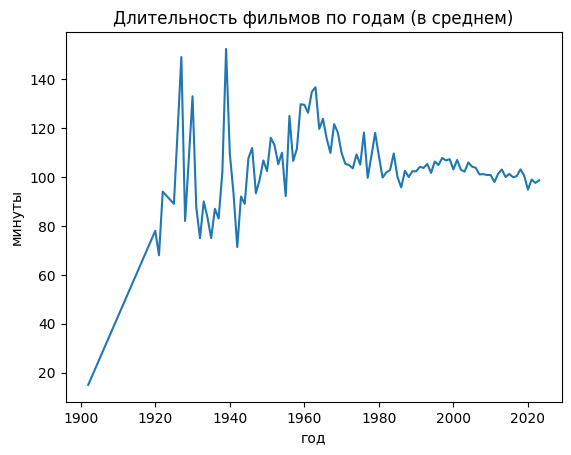

In [255]:
mean_runtime.plot();
plt.title("Длительность фильмов по годам (в среднем)") # title
plt.ylabel("минуты")
plt.xlabel("год");

всплески по длительности  фильмов можно объяснить  небольшим количеством фильмов в эти периоды. В базе данных количество лент  произведенных в 40-е годы  небольшой: 3-6, поэтому  средняя длительность конечно же  могла быть  такого размера, видим что  к 2020 в связи с увеличением количества лент мы приходим к средним покзазетелям  - 100 минут.

__Выделим фильмы начиная с 90 года по текущий момент(массовое производство cвысокими бюджетами) и посмотрим какие доходы имеют фильмы__

In [256]:
films_after_90_with_revenue = df_last[(df_last['release_year'] >= 1990) & (df_last['revenue'] != 0)] #сделаем  выборку где есть только значения с  revenue != 0 (недостаток данных)
len(films_after_90_with_revenue)
print(f'Осталось  {len(films_after_90_with_revenue)} фильмов произведенных  после 90 - х годов:')

Осталось  4637 фильмов произведенных  после 90 - х годов:


In [257]:
films_after_90_with_revenue.revenue.describe()

count    4.637000e+03
mean     1.195949e+05
std      2.074110e+05
min      1.000000e-03
25%      1.063238e+04
50%      4.717504e+04
75%      1.368858e+05
max      2.923706e+06
Name: revenue, dtype: float64


по  неполным 5000 записям  видим что  средние показатели в прибыли  производства фильма с 90-хх гг = 120 млн долларов на  каждый фильм, медианные показатели - 47 млн долларов на  каждый фильм-пример того как  отдельные сильные  показатели по другим фильмам влияют  на средние значения общей массы.


In [258]:
films_after_90_with_revenue[films_after_90_with_revenue['revenue'] == films_after_90_with_revenue['revenue'].max()]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
130,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",English,7.6,29040,188.103,"In the 22nd century, a paraplegic Marine is di...",237000.0,"Dune Entertainment, Lightstorm Entertainment, ...",2923706.026,162,Enter the world of Pandora.,2009,"(6.0, 8.0]","(2.284, 1023.887]"


Аватар 2009 года собрал  самую большюю прибыль
___

__построим  "Ящик с усами" - какое распределение в доходах увидим__

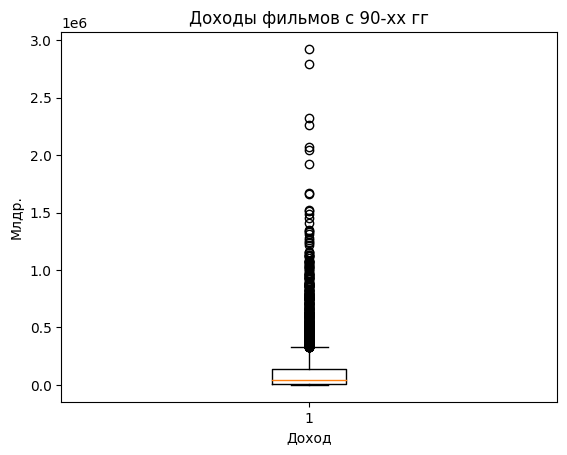

In [259]:
plt.boxplot(x = 'revenue',   data=films_after_90_with_revenue)
plt.title('Доходы фильмов с 90-хх гг')
plt.xlabel('Доход')
plt.ylabel('Млдр.')
plt.show();


In [260]:
print(films_after_90_with_revenue['revenue'].quantile(q=0.25))
print(films_after_90_with_revenue['revenue'].quantile(q=0.75))


10632.378
136885.767


In [261]:
round(films_after_90_with_revenue['revenue'].quantile(q=0.75)+(films_after_90_with_revenue['revenue'].quantile(q=0.75) - films_after_90_with_revenue['revenue'].quantile(q=0.25)*1.5),2)

257822.97

по "верхнему усику" - графика boxplot заметно  что  от 75 % перцентиля +1,5 межквартильный размах от него -   верхняя его граница бОльшей части  фильмов сильно не доходит даже до полумиллиарда прибыли, а точнее(258.6 млн) - все что  выше - нетипичные показатели  сборов для  общей массы фильмов.
___

посмотрим какие  именно фильмы  boxplot считает нетипичными (выделим "выбросы")

In [262]:
revenue_blowout = films_after_90_with_revenue[films_after_90_with_revenue['revenue'] > 258541.16]
revenue_blowout.sample(3)


,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
851,399579,Alita: Battle Angel,2019-01-31,"Action, Science Fiction, Adventure",English,7.2,8172,53.955,When Alita awakens with no memory of who she i...,170000.0,"Troublemaker Studios, Lightstorm Entertainment...",404980.543,122,An angel falls. A warrior rises.,2019,"(6.0, 8.0]","(2.284, 1023.887]"
1103,11324,Shutter Island,2010-02-14,"Drama, Thriller, Mystery",English,8.2,21637,50.113,World War II soldier-turned-U.S. Marshal Teddy...,80000.0,"Phoenix Pictures, Paramount, Appian Way, Sikel...",294800.000,138,Some places never let you go.,2010,"(8.0, 10.0]","(2.284, 1023.887]"
825,559,Spider-Man 3,2007-05-01,"Fantasy, Action, Adventure",English,6.4,12660,57.637,The seemingly invincible Spider-Man goes up ag...,258000.0,"Laura Ziskin Productions, Marvel Studios",890871.626,139,The battle within.,2007,"(6.0, 8.0]","(2.284, 1023.887]"


In [263]:
len(revenue_blowout)

572

572 фильмов (очень неплохо) из тех  что перевалили границу межквартильного размаха

In [264]:
blowout_by_years= revenue_blowout.groupby('release_year')['id'].agg('count').reset_index()
blowout_by_years = blowout_by_years.rename(columns = {'id':'count'})
blowout_by_years

,release_year,count
0,1990,4
1,1991,4
2,1992,6
3,1993,6
4,1994,6
5,1995,10
6,1996,8
7,1997,8
8,1998,11
9,1999,13


In [265]:
fig = px.bar(blowout_by_years, x = 'release_year', y = 'count',  color =  'count',   title= "Наиболее успешные года ")
fig.show();

Наиболее успешными   выявлены:2014, 2017  и максимум 2018 гг. - концентрация  успешных фильмов  них была  наибольшей.
какие это были фильмы? и вообще - окупился ли бюджет - получено было много, но также и потрачены серьезные суммы


In [266]:
years = [2014,2017,2018] #создадим список

In [267]:
issure_budget_revenue =  revenue_blowout.query('release_year in @years') #оставим только фильмы выпущенные в  выделенных годах
issure_budget_revenue.sample(3)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
703,260346,Taken 3,2014-12-16,"Thriller, Action",English,6.2,5213,49.202,Ex-government operative Bryan Mills finds his ...,48000.0,"EuropaCorp, Grive Productions, M6, TSG Enterta...",325771.424,109,It Ends Here,2014,"(6.0, 8.0]","(2.284, 1023.887]"
294,91314,Transformers: Age of Extinction,2014-06-25,"Science Fiction, Action, Adventure",English,5.9,7268,111.904,"As humanity picks up the pieces, following the...",210000.0,"di Bonaventura Pictures, Tom DeSanto/Don Murph...",1104054.072,165,"This is not war, it's extinction.",2014,"(4.0, 6.0]","(2.284, 1023.887]"
479,122917,The Hobbit: The Battle of the Five Armies,2014-12-10,"Action, Adventure, Fantasy",English,7.3,12963,74.546,Immediately after the events of The Desolation...,250000.0,"Warner Bros. Pictures, WingNut Films, New Line...",956019.788,144,Witness the defining chapter of the Middle-Ear...,2014,"(6.0, 8.0]","(2.284, 1023.887]"


In [268]:
round(issure_budget_revenue.agg({'budget':['mean','median','max'], 'revenue':['mean','median','max']}),2)

,budget,revenue
mean,118668.27,579791.82
median,125000.00,487862.26
max,300000.00,2046239.64


можем признать что бюджет фильмов по выбранным нами  3-х лет был окуплен
в среднем бюджет фильмов  был 119 млн и средний же доход - 580 млн.
медианные показатели дохода  также  в несклько раз выше  дохода  
___

также интересно  - какие жанры фильмам принесла такая прибыль и какие продюсерские компании участвовали в создании
раз  прибыль высокая - оценки рассматривать не будем
Используем данные  выборки  с 90-хх годов  с данными по выбросам

In [269]:
revenue_blowout.head(2)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"Action, Adventure, Science Fiction",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000.0,"Marvel Studios, Kevin Feige Productions",464566.092,125,Witness the beginning of a new dynasty.,2023,"(6.0, 8.0]","(4073.449, 5089.969]"
2,502356,The Super Mario Bros. Movie,2023-04-05,"Animation, Adventure, Family, Fantasy, Comedy",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000.0,"Universal Pictures, Illumination, Nintendo",1121048.165,92,NaN,2023,"(6.0, 8.0]","(3056.928, 4073.449]"


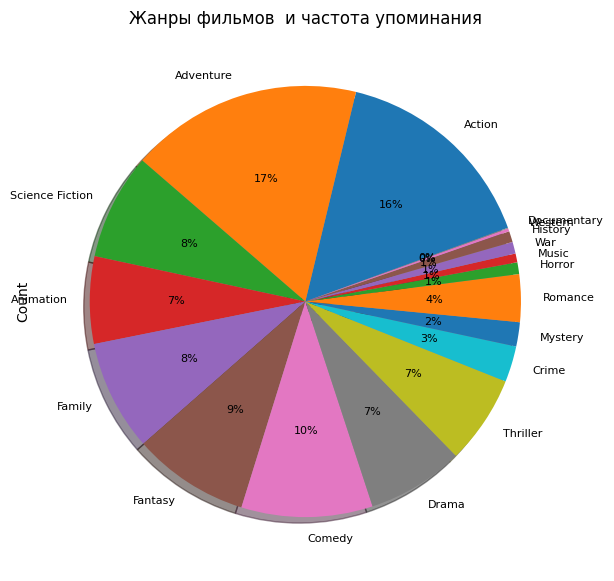

In [270]:
pie_genre(revenue_blowout)

Приключения, Экшены, Комедии, Фантастика - в топ прибыльных жанров.
менее  востребованы жанры:Война, История, Муpыка и Документальные фильмы
НО! помним что это САМЫЕ прибыльные  фильмы  с 90 годов!
___

обратим внимание на продюсерские компании

In [271]:
bar_productions(revenue_blowout)


                      Producer  Count
48       Warner Bros. Pictures     80
51            20th Century Fox     71
58        Walt Disney Pictures     65
2           Universal Pictures     64
24                   Paramount     60
26           Columbia Pictures     47
0               Marvel Studios     33
17        DreamWorks Animation     28
18             New Line Cinema     27
67          Legendary Pictures     25
61         DreamWorks Pictures     23
120  Village Roadshow Pictures     22
81                       Pixar     21
31        Amblin Entertainment     19
50          Dune Entertainment     19
100          TSG Entertainment     17
148           Relativity Media     16
68                Heyday Films     16
16                   Lionsgate     14
7          Metro-Goldwyn-Mayer     13


In [272]:
producers_list_revenue_blowout= revenue_blowout.productions.to_list()

Worner Bros на первом месте,  20th century Fox на 2 месте, далее Walt Disney и т.д. - немного ситуация изменилась.




#Выводы
__по основному блоку - общий анализ данных в датафрейме__

__Киноленты__  в  данных представлены  довольно широко:
Как по годам: с 1902 по  еще не вышедшие на экраны  в 2026 годам. Отметим что Бум кинопроизводства(выход на экран кинолент)   стартовал в 80-90 хх гг.

Так  и по показателю количеству языков на  котором снимались – 48. Английский язык в лидерах съемок 7098 лент  из 9751  уже  вышедших на экраны.

Жанры представлены  довольно широко, от самых популярных (рассмотрим далее) до  документалистики, которую как отметим, зрители не очень жалуют.

Средний рейтинг  лент от 0 до 10, серьезная часть данных   более 4 тыс. записей отмечена со средним рейтингом - 6, крайне мало произведений с рейтингом 10 или 1-2. Тем не менее заметим что ставить оценки  зрители не очень стремятся, что не относится к  мировым  Хитамв – в этом случае  могут проголосовать и  более 30 тыс. зрителей.

__Бюджет__ -здесь показания от очень скромных - 1 млн, но есть и ОЧЕНЬ дорогие фильмы с - около 640 млн. Современная тенденция бюджета(если брать в расчет фильмы с 90-хх годов)  - 50-70 млн долларов за ленту. Подавляющая  часть снимается на английском  языке, продюсерские компании которые  чаще участвуют  в съемках – американские, поэтому средние показатели в бюджете фильмов довольно высокие.  

Отметим с учетом вышесказанного, что превалируют фильмы с доходом менее четверти миллиарда долларов, но  выделим  максимальную прибыль одной киноленты:она  немного не добрала до 3 млрд. долларов (Аватар 2009 года).

Средняя длительность  произведений 100-125 минут чаще, но  есть боле продолжительные до  400 минут, это сериалы, мини-сериалы.  
Как ранее отмечено с 80-90 постоянно повышались  объевы  выпуска,  в 2022 году вышло наибольшее количество фильмов – 931, далее показатели кратно упали до 283 фильмов уже в следующем году – следствие  медицинских ограничений в период заболеванием covid. такие цифры обоснованы тем что от момента создания сценария до выхода фильма на большие экраны проходит много времени, иногда  1–2 года.

При анализе выявили  __Линейную взаимосвязь__ данных относительно:
- Количеством голосовавших  с общим доходом фильма что логично - большее кол-просмотров фильма = бОльшее количество отзывов и увеличение прибыли от фильма.

- Бюджет  и  количество проголосовавших.

- Бюджет  и доходность.


> Для последующей оценки  уже представленных на экран и планируемых лент  без оценок  зрителей разделили общее количество (9905) после очистки пропусков данных на 2 части: 9751 и 154 кол-ва фильмов соответственно.

В уже вышедших лентах обнаружили  что некоторые картины могут  пересниматься от 2 до 5 раз (306 наименования) в разные  годы.  Хотят повторить  прошлые  впечатляющие  успехи. В лидерах списка Золушка, Красавица и чудовище и др. Описание жанров не всегда точно  дублируется с оригинала,  добавляются другие  виды в новое произведение.  
Всего  смогли индентифицироват таких - 643  ленты. В этой же когорте оказались  и сиквелы и продолжение Киноэпопей – тот  же  “Джон Уик”, которых снимали  в виде франшизы.

Какие-то произведения  снимали 2 раза, Золушку   повторяли 5 раз, Красавицу и чудовище - 4 раза и т.д.

Если взять к примеру Золушку, то первое произведение было выпущено в 50-г и в прокате заняло средний рейтинг 7 - очень хорошие показатели с учетом того что не было интернет-платформ для широкого охвата - зрители высоко оценили произведение.
Если цифры в бюджете и выручке правдивы, то при расходе в 2,9 млн., 263,6 млн принесло прибыли. Ясно что популярность произведения впечатлила и уже в 2015 году на успехе предшественницы – 1(ой) Золушки повторили достижения и в рейтинге (6,8) и в прибыли - заработано 543,5 млн при затратах в 95 млн.
Примечательно что самые частые экранизации  романтические/фантазийные/для семейного просмотра фильмы по характеристикам не так сильно встречаются в описании – всего по 5 процентов.

Наиболее упоминание  в повторных сьемках: Драма - 15 %, Комедии - 11 %, Экшены/Триллеры - 10%.
___

Среди уже выпущенных фильмов  снова английский  язык в приоритете -7098 выпусков, следующий по интенсивности - японский - 693 и примечательно что почти на одном уровне выходят фильмы на китайском и кантонском языках (147/134).

На русском языке фильмы представлены в кол-ве 67 шт.

Средний  рейтинг этих кинолент  также  от 0-10, отметим что  из 9751 лент:

- 104 имеют самый низкий рейтинг от 0-2 (1%),
- 121 лента   от 2-4 (1%),
- 2537 от 4-6 (24%),
- 6694 от 6-8 (69 %),
- 295 от 8 до 10 баллов  (3 %).


__Какие характеристики у популярных фильмов (их всего 16) по мнению TMBd__:

•	фильмы выпущенные в 22-23 году

•	на английском языке

•	средний проголосовавший зрителями рейтинг 6.6-8.3

•	бюджет максимум 460 млн долл.

•	доход более 2 миллиардов (максимум)

•	время ленты от 91- до 192 минут

•	Экшен – 19 %,приключения - 17%, Фэнтэзи /комедии- 9 % , менее всего – Историческая тематика и война - 3%

Это: последний Аватар (Путь воды), John Wick: Chapter 4, Кот в сапогах, Creed III - is a 2023 American sports drama film - т.е. самые новые но в то же время рейтинговые произведения. В то же время некоторые в России ленты наверное не очень известны и популярны: к примеру Загадочное убийство 2.

На примере  линии Аватар  подтвердили  идею что  странные рейтинги популярности у TMDB: у 1 Аватара рейтинг меньше чему 2- го а проголосовало  в 3 раза больше - но это совершенно нормально за счет кол-ва голосов.
На платформе   же  1 Аватар  менее популярен чем 2-ой -  скорее  предположила бы наоборот, но показатели  именно такие.

По бюджету – на  Аватар  в 2022 потратили  больше  но получили на 600 млн. меньше чем за Аватар 2009 год.

__Повышение  бюджета  на производство__ как и кол-во релизов  начинается в 80-90-хх годах. Минимум  составлял  - 1 млн долл. Максимум – 460 млн (2022 год).

__Productions__  - ситуация подобна жанрам - в одном фильме может быть несколько  компаний-продюсеров.
Американские продюсеру лидируют с ОГРОМНЫМ перевесом.
Warner Bros / Universal Pictures  продюсируют более 400 фильмов каждый.

__Доходность  фильмов с  90 х годов__ (по неполым 5 тыс.  записям): отметим что средний revenew- 120 млн, медианные показатели хуже – 47 млн. Разные цифры объясняется  большими размерами прибыли которые получают хиты, тот же  Аватар с 2,9 млрд. долл - по отношению ко всем данным - это сильный выброс.
572 ленты  из  списка  вышедших после 90 г  являются нетипичными по показателям  сборов: в 2014, 2017 и 2019 годах  таких фильмов оказалось больше чем в другие годы.

При анализе прибыли этих фильмов  отметим что   затраты  на производство окупились многократно. В среднем бюджет фильмов  был 119 млн и средний же доход - 580 млн. Медианные показатели дохода  также  в несколько раз выше  дохода.  

Среди жанров таких фильмов отметим:  Приключения – 17 %, экшены 16 % , комедии 10 % и т.д. , но документальные фильмы в аутсайдерах по упоминанию.
Приложили руку  к  самым  прибыльным фильмам:Worner Bros, 20th Century Fox,  Walt Disney Pict.
Средние и медианные показатели по времени длительности ленты совпадают, максимально – 449 минут (сериал).

> __Что можно отметить__: база данных существует с 2008 года, в ней информация  о лентах  до 50-хх   годов представлена более полно чем за последующие периоды (есть вероятность, конечно, что  были проблемы  при парсере  данных). Но  важной информацией для анализа является размер  бюджета  фильмов,  на кинопортале  же много записей  с  41 года – с минимумом - "0" . Пожелаем более полно представлять данные. Также  хотелось бы   или пересмотреть колонку Popularity  или пересчитать  этот рейтинг - данные в нем малопонятны и в целов возникает по нему много вопросов.

> Так отметим что  в текущее время наиболее перспективны съемки, с такими жанрами как: приключения, экшены, комедии, научная фантастика и драмы. Не очень интересуются документальными, военными и историческими лентами.



___

#Будущие релизы:

продолжаются ли общие тенденции  в жанрах, времени фильмов,

In [273]:
df_new.sample(4)

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year
3527,1118609,The Same Battle,2023-05-08,Drama,English,0.0,0,23.501,"Devastated by the murder of his only daughter,...",7.0,,0.0,13,You're never too far gone.,2023
4593,747188,Asteroid City,2023-06-09,"Comedy, Romance, Science Fiction",English,0.0,0,26.388,Set in a fictional American desert town circa ...,0.0,"American Empirical Pictures, Indian Paintbrush",0.0,105,NaN,2023
6041,1118617,One Last Chance,2023-05-09,"Drama, Horror",English,0.0,0,22.705,A retired world-renown surgeon must face his d...,5.0,"Will Morris Productions, Merry Oaks Films",0.0,16,You always get another chance,2023
9471,1099639,The Temptation of the Mature 50s Mother-in-law,2023-02-03,"Romance, Drama",Korean,0.0,0,14.282,A young couple lives alone with their father-i...,0.0,,0.0,0,NaN,2023


In [274]:
len(df_new)

154

df_new - 154  новых фильма планируется к выпуску
___
__какие жанры  указаны в описаниях новых релизов?__

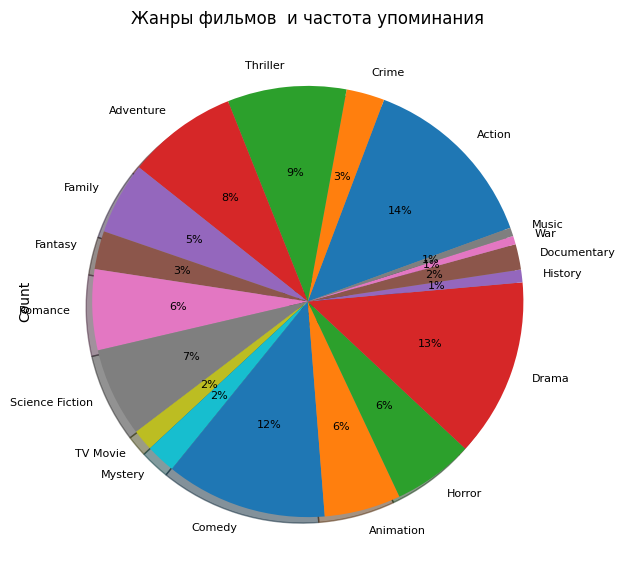

In [275]:
pie_genre(df_new)

Экшены/Драма/комедии - тройка лидеров - Есть отличия от  градаций  жанров прошедших  релизов.

__какой бюджет будет потрачен на производство__

In [276]:
df_new.budget.describe()

count       154.000000
mean      16400.972727
std       57386.874055
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      340000.000000
Name: budget, dtype: float64

Мало записей о бюджете,максимально будет выделено  340 млн за одну киноленту

__рассмотрим продюсерские компании__

In [277]:

bar_productions(df_new)

                    Producer  Count
0         Universal Pictures      7
8                  Paramount      7
69            Marvel Studios      6
14     Warner Bros. Pictures      6
25         Columbia Pictures      6
70   Kevin Feige Productions      6
4       Walt Disney Pictures      5
51                 Lionsgate      4
21   Lord Miller Productions      3
39     Blumhouse Productions      3
38        The Safran Company      3
156     20th Century Studios      3
29      Avi Arad Productions      3
72     21 Laps Entertainment      3
27      Marvel Entertainment      3
26   Sony Pictures Animation      3
46        Legendary Pictures      3
80      DreamWorks Animation      3
12     New Republic Pictures      3
17                  DC Films      3


из данных  которыми обладает TMDB можем сказать что  в производстве  участвуют, лидеры: Universal, Warner Bros., Paramount, Walt Disney, Columbia Pictures
Здесть картина поменялась

#Выводы
тенденции будущих релизов

154  новые ленты планируется к выпуску.

Жанры представлены отмаксимума  по  убыванию: Экшены/Драма/комедии - тройка лидеров – отметим  небольшие отличия от  градаций  жанров прошедших  релизов.

Максимальный бюджет на одну киноленту – 340 млн.

В производстве будут участвовать (по убыванию частоты упоминания):
Universal, Warner Bros., Paramount, Walt Disney  и Columbia Pictures.


___

#Рассмотрим фильмы  вышедшие  на русском языке подробнее

- какое количество в общем
- дата выхода на экраны, количество фильмов
- жанры
- какой средний рейтинг
- бюджет (если известен)
- продюсерские компании
- доход



In [278]:
russian_movies = df_last[df_last['language'] == 'Russian']
print(f'В базе данных TMDB представлено {len(russian_movies)} фильмов')

В базе данных TMDB представлено 67 фильмов


In [279]:
print(f' Фильмы выходившие на русском языке  были произведены с  {russian_movies.release_year.min()}   по  {russian_movies.release_year.max()} гг')

 Фильмы выходившие на русском языке  были произведены с  1965   по  2023 гг


In [280]:
count_film_russian_lang = russian_movies.groupby('release_year')['id'].count().reset_index()

count_film_russian_lang

,release_year,id
0,1965,1
1,1966,1
2,1967,1
3,1972,1
4,1975,1
5,1979,1
6,1985,1
7,2004,2
8,2006,1
9,2007,1


в 21 году  база данных TMDB  представила  11 фильмов выпущенных на русском языке - это максимум

In [281]:

count_film_russian_lang=count_film_russian_lang.rename(columns ={'id':'count'})   #переименуем колонки

In [282]:
fig = px.bar(count_film_russian_lang, x = 'release_year', y = 'count',  color='count',    title= "Количество представленных фильмов по годам на русском языке") #посстроим график
fig.show();

__Часто встречающиеся жанры__

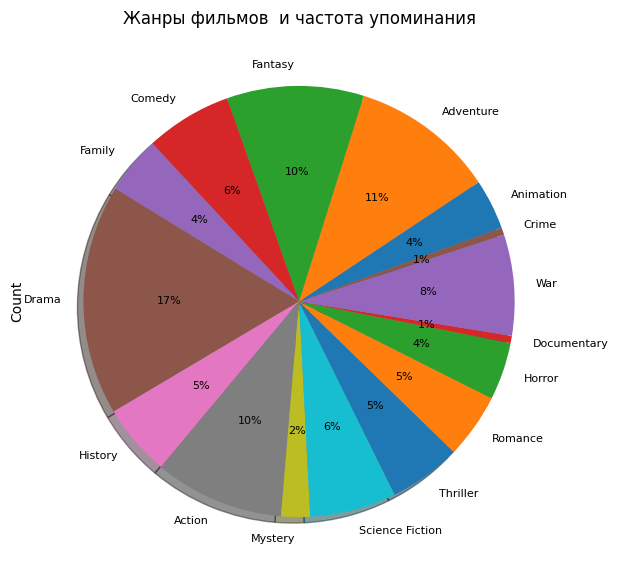

In [283]:
pie_genre(russian_movies)

Драма - 17% - лидирует в описании фильмов выпущенных на русском языке, затем Приключения  - 11 % и в самом конце - Документальные фильмы.


____

In [284]:
russian_movies.vote_average.describe()


count    67.000000
mean      6.692537
std       1.211475
min       3.200000
25%       6.100000
50%       6.800000
75%       7.500000
max      10.000000
Name: vote_average, dtype: float64

минимум - 3,2 оценка  средняя - 6,69 есть и  10-балльные.
посмотрим какие фильмы   были оценены болье 6-ти?
и здесь уже видим что более  уже 50%  фильмов в БД имеют оценку более 6,8-ти баллов

In [285]:
russian_movies['budget'].describe()


count       67.000000
mean      3517.742328
std       7474.079951
min          0.000000
25%          0.000000
50%          0.000000
75%       5000.000000
max      49000.000000
Name: budget, dtype: float64

мало данных по бюджету - в основном указаны Нули и максимум- 49 млн. долларов

что это за фильм?(интересно)

In [286]:
russian_movies[russian_movies['budget']>=49000]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
3503,428045,Iron Mask,2019-08-16,"Action, Adventure, Family, Fantasy",Russian,6.1,349,22.743,Commissioned to map the Far East territories o...,49000.0,"CTB Film Company, Russian Film Group, China Fi...",0.0,121,NaN,2019,"(6.0, 8.0]","(2.284, 1023.887]"


Iron Mask другое название - "Та́йна печа́ти драко́на" — российско-китайский полнометражный художественный фильм 2019 года[2] режиссёра Олега Степченко, который является сиквелом картины «Вий» (2014); актёрский состав первого фильма серии был усилен известными русскими, китайскими и американскими актёрами[3][4]. Основной целью кинокартины является демонстрация культуры и истории двух государств — России и Китая. Седьмой русский фильм, снятый в формате IMAX.<https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B9%D0%BD%D0%B0_%D0%BF%D0%B5%D1%87%D0%B0%D1%82%D0%B8_%D0%B4%D1%80%D0%B0%D0%BA%D0%BE%D0%BD%D0%B0>



очень жаль что нет  упоминания о доходе - проблема  этого  датасета

__займемся продюссерами русских фильмов__

In [287]:

bar_productions(russian_movies)

                        Producer  Count
35                       Mosfilm      9
6                    Cinema Fund      8
12              CTB Film Company      7
10           Central Partnership      6
11               KIT Film Studio      4
25      Mars Media Entertainment      4
80                  Studio Trite      4
7                       Russia-1      4
26                        AMedia      3
71           Bazelevs Production      3
22                      QS Films      3
5    The Walt Disney Company CIS      3
4                  Black & White      3
3                         Yellow      3
31           Art Pictures Studio      3
52                 First Channel      3
103             20th Century Fox      2
1               Licensing Brands      2
36              Wizart Animation      2
101                       Tabbak      2


в лидерах-Мосфильм, 9 раз встречалось название  в  описании к фильмам-производство

In [288]:
russian_movies.revenue.describe()

count       67.000000
mean      6159.872970
std      12426.876309
min          0.000000
25%          0.000000
50%          0.000000
75%       4648.435500
max      50336.279000
Name: revenue, dtype: float64

упоминание о наличии дохода (если он был - мало записей). максимум - 50 млн.
найдем этот фильм

In [289]:
russian_movies[russian_movies['revenue'] >50336]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
9134,3040,Night Watch,2004-06-27,"Fantasy, Action, Thriller",Russian,6.2,637,12.12,"Among normal humans live the ""Others"" possessi...",10000.0,"Bazelevs Production, Tabbak, Fox Searchlight P...",50336.279,114,All That Stands Between Light And Darkness Is ...,2004,"(6.0, 8.0]","(2.284, 1023.887]"


и этот фильм:'Ночной дозор' c бюджетом 10 млн!

__продолжительность кинолент__

In [290]:
russian_movies.runtime.describe()

count     67.000000
mean     110.179104
std       30.161146
min        0.000000
25%       97.000000
50%      110.000000
75%      127.500000
max      205.000000
Name: runtime, dtype: float64

в среднем  - 110 минут, максимально - 205 минут

In [291]:
russian_movies[russian_movies['runtime'] == 205]

,id,title,release_date,genres,language,vote_average,vote_count,popularity,overview,budget,productions,revenue,runtime,film_phrase,release_year,vote_average_cut,popularity_bins
9440,895,Andrei Rublev,1966-12-16,"Drama, History",Russian,8.1,663,11.083,"An expansive Russian drama, this film focuses ...",0.0,"Mosfilm, Tvorcheskoe Obedinienie Pisateley i K...",0.0,205,NaN,1966,"(8.0, 10.0]","(2.284, 1023.887]"


Андрей Рублев - 205 минут длится кинолента и  средний рейтинг 8,1 балла -очень высоко оценили зрители ленту
___



#Выводы по русским кинолентам
имеющихся в  базе данных TMDB

В базе данных  представлено 67 фильма которые выходили на русском языке  в период  с 1965 по 2023 гг.

В 2021 году  было максимальное представление кинолент – 11 фильмов.

Наиболее  часто встречаются драмы (17%), затем приключения, замыкают  представление кинолент – документальные фильмы.

Зрители довольно высоко оценивают  фильмы, средняя оценка – 6,8 баллов из 10 возможных.

К сожалению  в связи с имеющимся недостатком  данных по доходу как и по бюджету не можем полно оценить эти показатели – максимальный зафиксированный бюджет  -49 млн долл. "Та́йна печа́ти драко́на" — российско-китайский полнометражный художественный фильм 2019 года.

Наибольший доход по имеющимся данным  заработал  Ночной дозор с бюджетом 10 млн.

Среди  продюсерских компаний лидирует  Мосфильм.

В среднем  кинолента на русском языке длится 110 минут,  а максимальная длина – 205 минут – это кинолента «Андрей Рублев» - 205 минут длится кинолента и  средний рейтинг 8,1 балла - очень высоко оценили зрители  произведение


___

##Дашборд Tableau


<https://public.tableau.com/views/TMDB_16891716426560/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link>

##Презентация

<https://drive.google.com/file/d/1Hbxxd6W0zdA_EyIN9T9QsS8pR6xJ83rY/view?usp=drive_link>